<a href="https://colab.research.google.com/github/Gobihanath/DTect/blob/main/DTect_Confusion_FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import cv2

input_shape = (256,256, 3)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
Image_Width = 256
Image_Height = 256
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=128

In [4]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset/Dtect | Dataset | New",
    seed=123,         #If you want to ensure that the shuffling of your dataset is the same across different runs, you can keep the seed value constant. If you don't care about reproducibility, you can omit the seed parameter or use a different value for each run.
    shuffle=True,
    image_size=Image_Size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5001 files belonging to 10 classes.


In [5]:
class_names = data_set.class_names
class_names

['Person 1',
 'Person 10',
 'Person 2',
 'Person 3',
 'Person 4',
 'Person 5',
 'Person 6',
 'Person 7',
 'Person 8',
 'Person 9']

## Data splitting

In [6]:
def get_dataset_partitions_tf(data_set, train_split=0.8,  val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split ) == 1

    ds_size = len(data_set)

    if shuffle:
        data_set = data_set.shuffle(shuffle_size, seed=123)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = data_set.take(train_size)
    val_ds = data_set.skip(train_size).take(val_size)

    return train_ds, val_ds


train_ds, val_ds = get_dataset_partitions_tf(data_set)

print(len(train_ds))
print(len(val_ds))

32
8


## Developing a model

In [7]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=input_shape))

model.add(layers.Conv2D(16, 3, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D())



model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(64, 3, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history  = model.fit(
    train_ds,
    batch_size=128,
    validation_data=val_ds,
    validation_steps = 8,
    verbose=1,
    epochs=20,
)

Epoch 1/20
32/32 [==============================] - 1356s 17s/step - loss: 2.4131 - accuracy: 0.1350 - val_loss: 2.1807 - val_accuracy: 0.1514
Epoch 2/20
32/32 [==============================] - 701s 16s/step - loss: 1.9254 - accuracy: 0.3251 - val_loss: 1.5181 - val_accuracy: 0.4932
Epoch 3/20
32/32 [==============================] - 717s 17s/step - loss: 1.4646 - accuracy: 0.4848 - val_loss: 1.2105 - val_accuracy: 0.5723
Epoch 4/20
32/32 [==============================] - 714s 17s/step - loss: 1.1029 - accuracy: 0.6165 - val_loss: 0.9840 - val_accuracy: 0.6508
Epoch 5/20
32/32 [==============================] - 731s 17s/step - loss: 0.8624 - accuracy: 0.6970 - val_loss: 0.7208 - val_accuracy: 0.7359
Epoch 6/20
32/32 [==============================] - 721s 17s/step - loss: 0.6646 - accuracy: 0.7591 - val_loss: 0.5265 - val_accuracy: 0.8291
Epoch 7/20
32/32 [==============================] - 681s 15s/step - loss: 0.5270 - accuracy: 0.8217 - val_loss: 0.4041 - val_accuracy: 0.8613
Epoch

In [10]:
model.save('/content/drive/MyDrive/ML Trained Models/Dtect_Confusion_FinalModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
train_loss, train_acc = model.evaluate(train_ds)
print('Training accuracy:', train_acc)

val_loss, val_acc = model.evaluate(val_ds)
print('Validation accuracy:', val_acc)


32/32 [==============================] - 297s 3s/step - loss: 0.0902 - accuracy: 0.9746
Training accuracy: 0.974609375
8/8 [==============================] - 217s 2s/step - loss: 0.0807 - accuracy: 0.9790
Validation accuracy: 0.9790055155754089


In [12]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ML Trained Models/Dtect_Confusion_FinalModel.h5')

## To print the confusion matrix of prediction

4/4 [==============================] - 2s 543ms/step


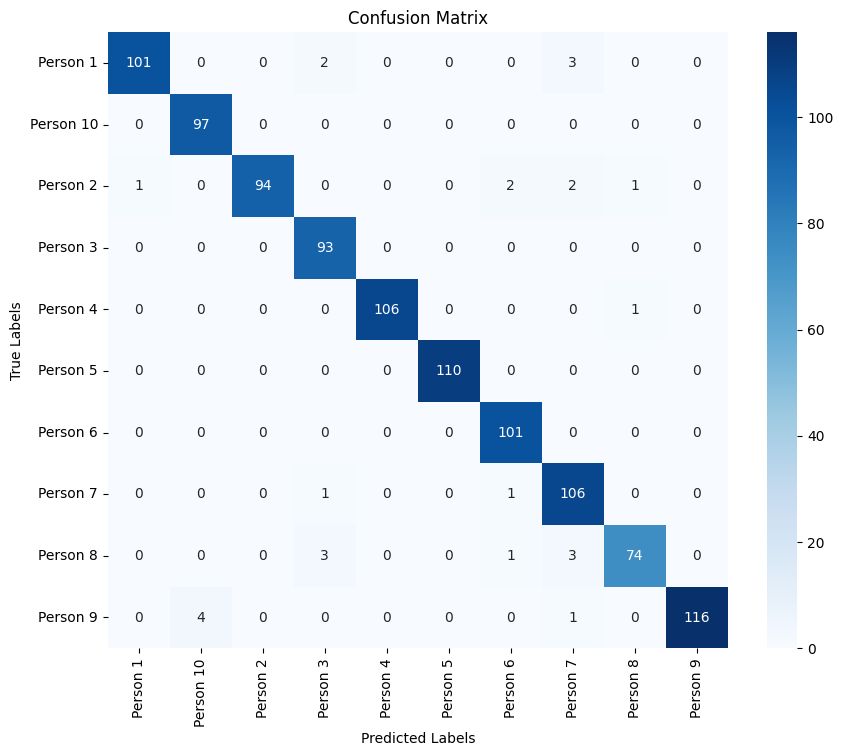

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predicted labels for the validation dataset
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
